In [1]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 1.1 MB/s eta 0:00:36
   ---------------------------------------- 0.3/38.8 MB 3.4 MB/s eta 0:00:12
   ---------------------------------------- 0.4/38.8 MB 3.7 MB/s eta 0:00:11
    --------------------------------------- 0.7/38.8 MB 4.3 MB/s eta 0:00:09
   - -------------------------------------- 1.0/38.8 MB 5.3 MB/s eta 0:00:08
   - -------------------------------------- 1.3/38.8 MB 5.7 MB/s eta 0:00:07
   - -------------------------------------- 1.7/38.8 MB 6.4 MB/s eta 0:00:06
   -- ------------------------------------- 1.9/38.8 MB 6.5 MB/s eta 0:00:06
   -- ------------------------------------- 2.1/38.8 MB 6.0 MB/s eta 0:00:07
   -- ------------------------------------- 2.3/38.8 MB 6.1 MB/s eta 0:00:06
   -- ------------------------------------- 2.5/38.8 MB 6.2 MB/s eta 0:00:06
   -- -------


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import cv2

#print(cv2.__version__)

img = cv2.imread('basket.png')

h, w, _ = img.shape

img_resized = cv2.resize(img, (w * 1, h * 1))

img_resized[100 : 350, 100 : 350, 0] = 240

cv2.imshow('resized_image', img_resized)
cv2.imshow('b_channel', b_channel)

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(10)

-1

In [9]:
import cv2
import numpy as np

cv2.namedWindow('mask')

def nothing(x):
    pass

cv2.createTrackbar('lh', 'mask', 140, 255, nothing)
cv2.createTrackbar('ls', 'mask', 17, 255, nothing)
cv2.createTrackbar('lv', 'mask', 98, 255, nothing)
cv2.createTrackbar('hh', 'mask', 199, 255, nothing)
cv2.createTrackbar('hs', 'mask', 125, 255, nothing)
cv2.createTrackbar('hv', 'mask', 216, 255, nothing)

cam = cv2.VideoCapture(0)

while (True):
    success, frame = cam.read(0)

    #frame[100 : 250, 100 : 550, 2] = 240
    #frame[:, :, 2] += 50
    
    #print(frame.shape)
    #frame = 255 - frame
    
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lh = cv2.getTrackbarPos('lh', 'mask')
    ls = cv2.getTrackbarPos('ls', 'mask')
    lv = cv2.getTrackbarPos('lv', 'mask')
    hh = cv2.getTrackbarPos('hh', 'mask')
    hs = cv2.getTrackbarPos('hs', 'mask')
    hv = cv2.getTrackbarPos('hv', 'mask')
    
    mask = cv2.inRange(hsv, (lh, ls, lv), (hh, hs, hv))
    
    cv2.imshow('mask', mask)
    
    connectivity = 4  
    # Perform the operation
    output = cv2.connectedComponentsWithStats(mask, connectivity, cv2.CV_32S)
    # Get the results
    # The first cell is the number of labels
    num_labels = output[0]
    # The second cell is the label matrix
    labels = output[1]
    # The third cell is the stat matrix
    stats = output[2]
    
    filtered = np.zeros_like(mask)
    
    for i in range(1, num_labels):
        a = stats[i, cv2.CC_STAT_AREA]
        top = stats[i, cv2.CC_STAT_TOP]
        left = stats[i, cv2.CC_STAT_LEFT]
        width = stats[i, cv2.CC_STAT_WIDTH]
        height = stats[i, cv2.CC_STAT_HEIGHT]
        #print(a)
        
        if (a >= 3000 and a < 4000):
            filtered[np.where(labels == i)] = 255
            print(a) 
            
            cv2.putText(frame, str(a), (left, top), cv2.FONT_ITALIC, 1, (0, 0, 255), 2, cv2.LINE_4)
            cv2.rectangle(frame, (left, top), (left + width, top + height), (0, 255, 0), 1)
            
            
    print('=================')      
    #break
    
    cv2.imshow('frame', frame)
    #cv2.imshow('hsv', hsv[:, :, 0])
    cv2.imshow('mask_filtered', filtered)
    
    key = cv2.waitKey(80) & 0xFF
    
    if (key == ord('q')):
        break

cam.release()
cv2.destroyAllWindows()
cv2.waitKey(10)

3512
3950
3960
3924
3841
3889
3872
3833
3819
3863
3826
3839
3915
3915
3898
3908
3926
3926
3927
3882
3941
3919
3919
3938
3896
3894
3847
3847
3886
3865
3865
3885
3856


-1

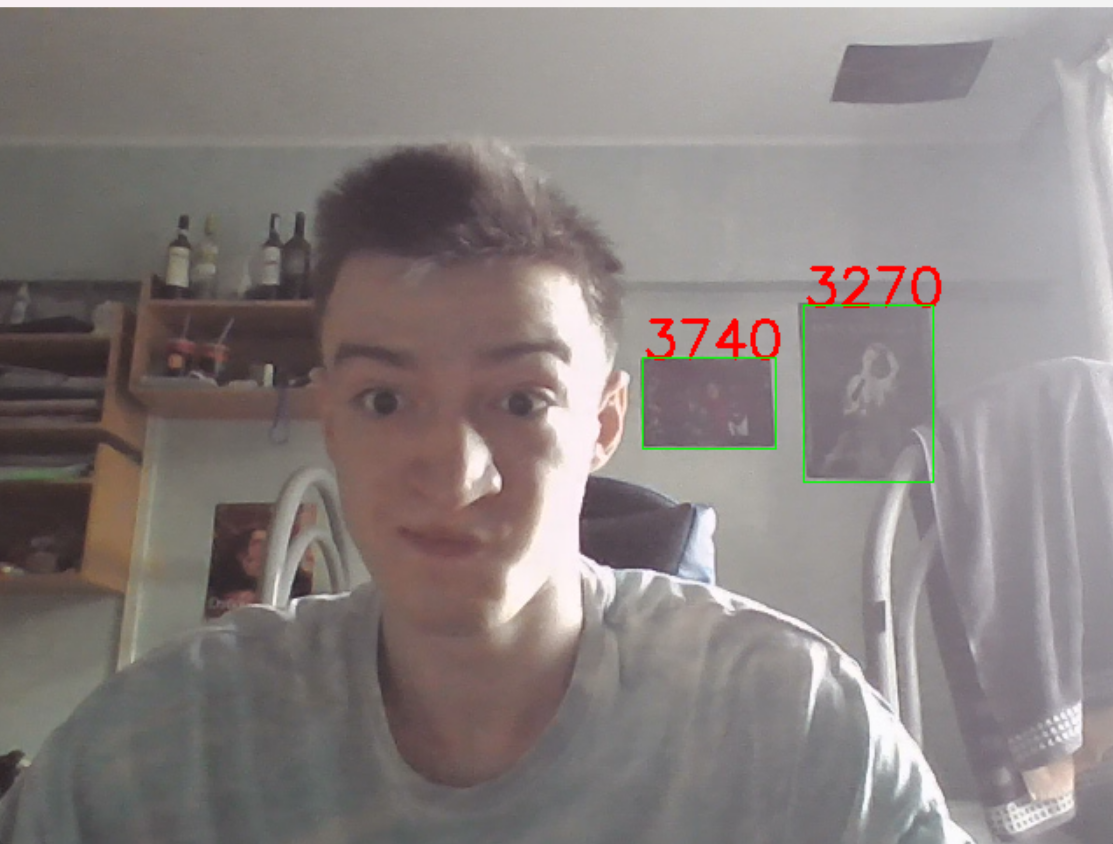

In [18]:
import cv2
import numpy as np

cv2.namedWindow('mask')

def nothing(x):
    pass

cv2.createTrackbar('lh', 'mask', 0, 255, nothing)
cv2.createTrackbar('ls', 'mask', 96, 255, nothing)
cv2.createTrackbar('lv', 'mask', 69, 255, nothing)
cv2.createTrackbar('hh', 'mask', 53, 255, nothing)
cv2.createTrackbar('hs', 'mask', 173, 255, nothing)
cv2.createTrackbar('hv', 'mask', 116, 255, nothing)

img = cv2.imread('basket.png')

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

while True:
    lh = cv2.getTrackbarPos('lh', 'mask')
    ls = cv2.getTrackbarPos('ls', 'mask')
    lv = cv2.getTrackbarPos('lv', 'mask')
    hh = cv2.getTrackbarPos('hh', 'mask')
    hs = cv2.getTrackbarPos('hs', 'mask')
    hv = cv2.getTrackbarPos('hv', 'mask')

    mask = cv2.inRange(hsv, (lh, ls, lv), (hh, hs, hv))

    cv2.imshow('mask', mask)

    connectivity = 4  
    # Perform the operation
    output = cv2.connectedComponentsWithStats(mask, connectivity, cv2.CV_32S)
    # Get the results
    # The first cell is the number of labels
    num_labels = output[0]
    # The second cell is the label matrix
    labels = output[1]
    # The third cell is the stat matrix
    stats = output[2]

    filtered = np.zeros_like(mask)

    for i in range(1, num_labels):
        a = stats[i, cv2.CC_STAT_AREA]
        top = stats[i, cv2.CC_STAT_TOP]
        left = stats[i, cv2.CC_STAT_LEFT]
        width = stats[i, cv2.CC_STAT_WIDTH]
        height = stats[i, cv2.CC_STAT_HEIGHT]
        #print(a)
        
        if (a >= 50 and a <= 1000):
            filtered[np.where(labels == i)] = 255
            
            cv2.putText(img, str(a), (left, top), cv2.FONT_ITALIC, 1, (0, 0, 255), 2, cv2.LINE_4)
            cv2.rectangle(img, (left, top), (left + width, top + height), (0, 255, 0), 1)


    cv2.imshow('img', img)
    #cv2.imshow('hsv', hsv[:, :, 0])
    cv2.imshow('mask_filtered', filtered)

    key = cv2.waitKey(80) & 0xFF
    
    if (key == ord('q')):
        break
    
    
cv2.destroyAllWindows()
cv2.waitKey(10)

-1

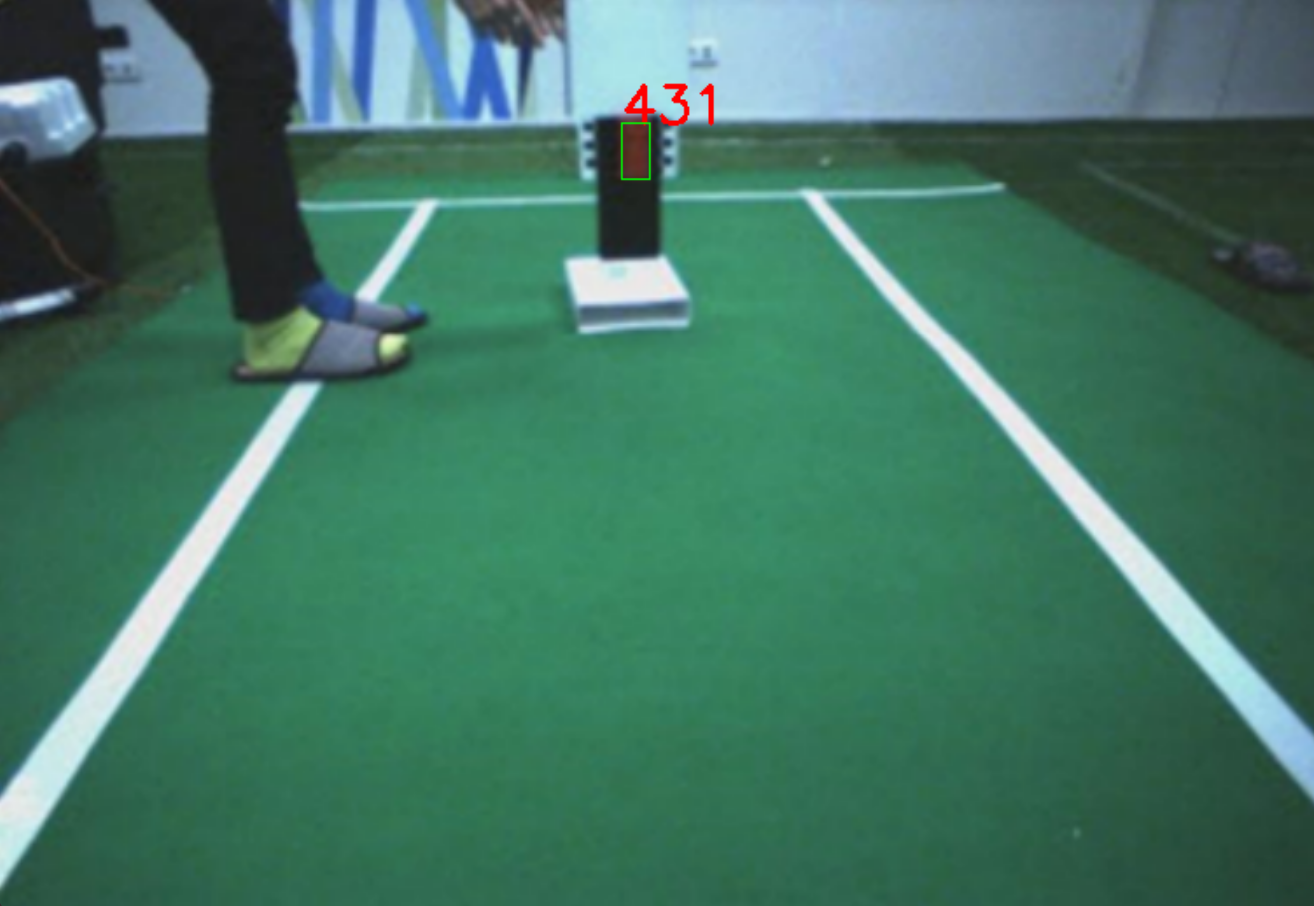